In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import time
from scipy.ndimage import convolve, generate_binary_structure
from PIL import Image

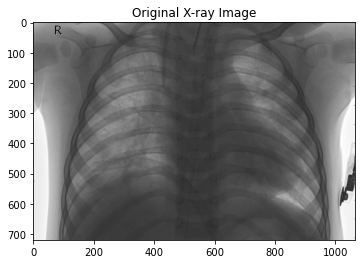

In [2]:
X = np.array(Image.open("X.png"))

plt.title("Original X-ray Image")
plt.imshow(X, cmap=plt.cm.get_cmap('gray').reversed())


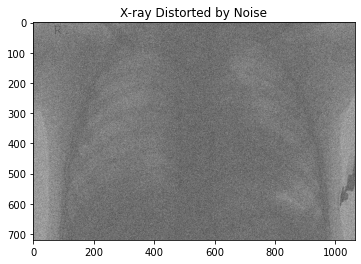

In [3]:
row,col= X.shape
mean = 0
var = 10000
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
noisy = X + gauss
noisy

plt.title("X-ray Distorted by Noise")
plt.imshow(noisy, cmap=plt.cm.get_cmap('gray').reversed())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

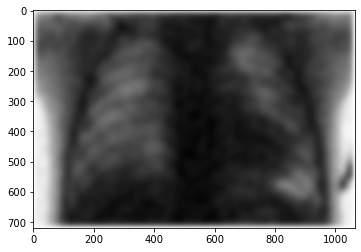

In [4]:
def Gibbs_Sampler_EO(X, a, b, row, T):
    
    # lambda functions to define even and odd structure of our matrix
    
    even = lambda i,j: 1 if (i+j)%2 == 0 else 0
    odd = lambda i,j: 0 if (i+j)%2 == 0 else 1
    z0 = X.copy() # initial sample of Z^0
    n = len(X[:, 0]) # number of rows
    m = len(X[0]) # number of columns
    
    for t in np.arange(T):
        print(t)
        delta = np.random.normal(0,1/(a+row),(n,m))
        
        
        # Solve for S
        
        z_pad = np.pad(z0, 1) # pad Z
        k = generate_binary_structure(2,1) # Binary Structure for neighbors
        S = convolve(z_pad,k, mode = 'constant', cval = 0) # find summation of neighbors, includes orignal point
        S = S[1:-1, 1:-1] # remove padding
        S = S - z0 # removes original point from neighborhood sum
        
        
        # Evens
        
        even_structure = np.array([even(i,j) for i in np.arange(n) for j in np.arange(m)]).reshape((n,m)) # even structure
        
        S_even = S*even_structure # even summation points
        
        X_even = X*even_structure # even X points
        
        delta_even = delta*even_structure # even delta Points
        z0_even = (row/(row+a))*X_even + (b/(b+row))*S_even + delta_even
        
        
        # Odds
        
        odd_structure = np.array([odd(i,j) for i in np.arange(n) for j in np.arange(m)]).reshape((n,m))
        S_odd = S*odd_structure
        X_odd = X*odd_structure
        delta_odd = delta*odd_structure
        z0_odd = (row/(row+a))*X_odd + (b/(b+row))*S_odd + delta_odd
        
        # combine odd and even
        
        z0 = z0_odd + z0_even
        
    return z0
start = time.time()
Z = Gibbs_Sampler_EO(noisy, 250, 62.5, .01,300) 
end = time.time()
print("Gibbs Blocked Sampler took: ", end - start, " seconds")
plt.imshow(Z, cmap=plt.cm.get_cmap('gray').reversed())

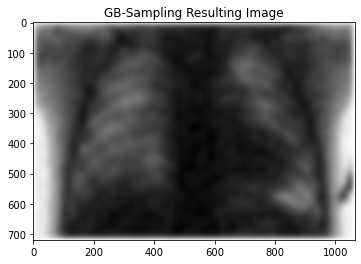

In [6]:
plt.title("GB-Sampling Resulting Image")
plt.imshow(Z, cmap=plt.cm.get_cmap('gray').reversed())